In [25]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sys
from pyspark.sql import SparkSession

#Let’s create sparkSession now to access functionalities of Spark

spark = SparkSession.builder \
.master("spark://10.130.10.80:7077") \
.appName("Project_main") \
.getOrCreate()

In [26]:
pwd

'/mnt/project-cluster-group22-pvc'

In [27]:
import pandas as pd
from pyspark.sql import functions as F

graph_df = pd.DataFrame(columns=['Day', '2020'])

In [28]:
# Read file lam_data_ppohjanmaa.csv 
df = spark.read.csv("/mnt/project-cluster-group22-pvc/lam_data_uusimaa_20/LAM_data_day75.csv", header=True, inferSchema=True, sep=";")

In [34]:
df.select(F.col("category"))

DataFrame[category: int]

In [39]:
df.select("category").show()

+--------+
|category|
+--------+
|       5|
|       5|
|       5|
|       5|
|       1|
|       5|
|       1|
|       1|
|       4|
|       1|
|       1|
|       1|
|       5|
|       5|
|       4|
|       1|
|       1|
|       5|
|       1|
|       1|
+--------+
only showing top 20 rows



In [47]:
df.groupBy('category').count().show()

+--------+-------+
|category|  count|
+--------+-------+
|       1|2563660|
|       6|  46711|
|       3|  13553|
|       5|  91969|
|       4|  72133|
|       7|  11669|
|       2| 118264|
|       0|   1274|
+--------+-------+



In [40]:
#Patches data
for day_number in range(75, 121):
    df = spark.read.csv("/mnt/project-cluster-group22-pvc/lam_data_uusimaa_20/LAM_data_day{}.csv".format(day_number), header=True, inferSchema=True, sep=";")
    
    vehicles20 = df.count()
    graph_df.loc[day_number] = [day_number] + [vehicles20]


In [41]:
print(graph_df.head())

    Day     2020
75   75  1854274
76   76  2783555
77   77  2667721
78   78  2541811
79   79  2610718


Text(0.5, 0, 'Day')

Text(0, 0.5, 'Vehicles on a road')

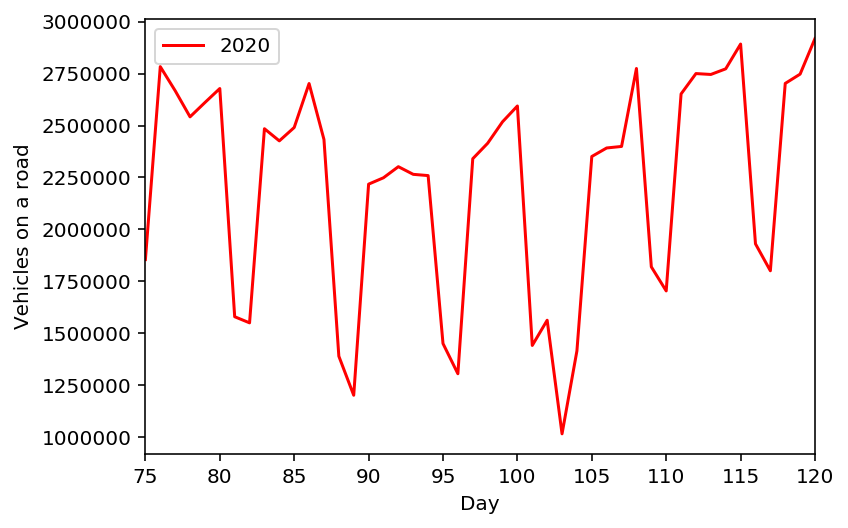

In [42]:
import matplotlib.pyplot as plt


ax = plt.gca()
ax.locator_params(integer=True)
ax.set_xlabel("Day")
ax.set_ylabel("Vehicles on a road")

#graph_df.plot(kind='line',x='Day',y='2019',ax=ax)
graph_df.plot(kind='line',x='Day',y='2020', color='red', ax=ax)

plt.show()

In [43]:
pwd

'/mnt/project-cluster-group22-pvc'

In [44]:
fig = ax.get_figure()
fig.savefig('/mnt/project-cluster-group22-pvc/graph_ppohjanmaa.jpg', dpi=300)

In [45]:
graph_df.head()

,Day,2020
75,75,1854274
76,76,2783555
77,77,2667721
78,78,2541811
79,79,2610718


In [46]:
#Safes dataframe that we don't need to calculated every time
graph_df.to_csv("Graph dataframe.csv", index=False)